In [501]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
from scipy.stats import multivariate_normal

import matplotlib.pyplot as plt
from matplotlib.mlab import bivariate_normal

from mpl_toolkits.mplot3d import Axes3D


In [502]:
def get_sample(dist0, dist1, n):
    x0 = dist0.sample((n,))
    x1 = dist1.sample((n,))
    y0 = torch.zeros(n, 1)
    y1 = torch.ones(n, 1)
    
    return torch.cat([x0, x1], 0), torch.cat([y0,y1], 0)

In [586]:
mu0, cov0 = [-4., -2.], [[2., 1.], [1., 2.]]
mu1, cov1 = [3., 1.], [[4., -3.], [-3., 4.]]

In [587]:
dist0 = torch.distributions.MultivariateNormal(torch.tensor(mu0), torch.tensor(cov0))
dist1 = torch.distributions.MultivariateNormal(torch.tensor(mu1), torch.tensor(cov1))

In [588]:
Xs_0 = np.empty(5000)
Ys_0 = np.empty(5000)

for i in range(5000):
    sample = dist0.sample()
    Xs_0[i] = sample[0]
    Ys_0[i] = sample[1]
    
Xs_1 = np.empty(5000)
Ys_1 = np.empty(5000)

for i in range(5000):
    sample = dist1.sample()
    Xs_1[i] = sample[0]
    Ys_1[i] = sample[1]

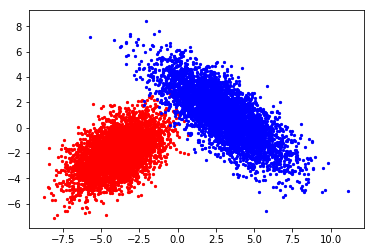

In [589]:
plt.figure()
plt.scatter(Xs_0,Ys_0, color='r', s=5)
plt.scatter(Xs_1,Ys_1, color='b', s=5)
plt.show()

In [549]:
layer = nn.Linear(2, 1)
for p in layer.parameters():
    print(p.data)
layer_opt = optim.SGD(lr = 1e-3, params = list(layer.parameters()))

tensor([[0.4220, 0.5282]])
tensor([0.4037])


In [550]:
log_freq = 500
for i in range(10000):
    if i%log_freq == 0:
        with torch.no_grad():
            x, y = get_sample(dist0, dist1, 100000)
            out = torch.sigmoid(layer(x))
            loss = F.binary_cross_entropy(out, y)
        print('Ошибка после %d итераций: %f' %(i/log_freq, loss))
    layer_opt.zero_grad()
    x, y = get_sample(dist0, dist1, 1024)
    out = torch.sigmoid(layer(x))
    loss = F.binary_cross_entropy(out, y)
    loss.backward()
    layer_opt.step()

Ошибка после 0 итераций: 0.141085
Ошибка после 1 итераций: 0.097688
Ошибка после 2 итераций: 0.077655
Ошибка после 3 итераций: 0.065946
Ошибка после 4 итераций: 0.058545
Ошибка после 5 итераций: 0.052947
Ошибка после 6 итераций: 0.048914
Ошибка после 7 итераций: 0.045758
Ошибка после 8 итераций: 0.042632
Ошибка после 9 итераций: 0.040542
Ошибка после 10 итераций: 0.038682
Ошибка после 11 итераций: 0.036842
Ошибка после 12 итераций: 0.035560
Ошибка после 13 итераций: 0.034906
Ошибка после 14 итераций: 0.033337
Ошибка после 15 итераций: 0.032065
Ошибка после 16 итераций: 0.031447
Ошибка после 17 итераций: 0.030486
Ошибка после 18 итераций: 0.030120
Ошибка после 19 итераций: 0.029196


In [ ]:
print([p.data[0] for p in layer.parameters()])

In [554]:
x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x, y)
pairs = torch.tensor(np.dstack((X, Y)), dtype=torch.float)

with torch.no_grad():
    z = torch.sigmoid(layer(pairs)).numpy()
z = z.reshape(200,200)

In [555]:
z = z[:-1, :-1]
z_min, z_max = 0, 1

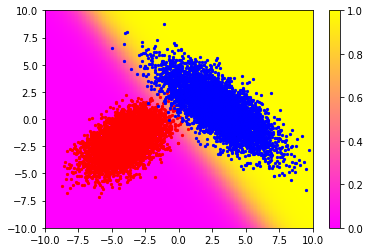

In [556]:
fig, ax = plt.subplots()

c = ax.pcolormesh(x, y, z, cmap='spring', vmin=z_min, vmax=z_max)
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.scatter(Xs_0,Ys_0, color='r', s=5)
plt.scatter(Xs_1,Ys_1, color='b', s=5)

plt.show()

In [594]:
dist0_pdf = multivariate_normal.pdf(pairs, mu0, cov0)
dist1_pdf = multivariate_normal.pdf(pairs, mu1, cov1)
ratio = dist1_pdf / (dist1_pdf + dist0_pdf)

In [595]:
ratio = ratio[:-1, :-1]

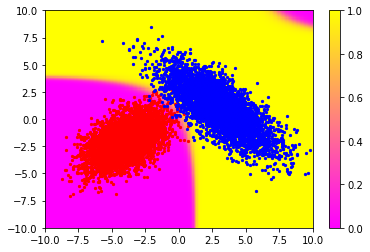

In [596]:
fig, ax = plt.subplots()

c = ax.pcolormesh(X, Y, ratio, cmap='spring')
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.scatter(Xs_0,Ys_0, color='r', s=5)
plt.scatter(Xs_1,Ys_1, color='b', s=5)

plt.show()